<a id='1'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> IMPORTING LIBRARIES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>IMPORTING LIBRARIES</center></h1> 


In [2]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [8]:
import math
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
#from imblearn.over_sampling import SMOTE

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas.compat._optional")

In [3]:
sns.set()
sns.set_theme(style='white')
sns.set(rc = {'figure.figsize':(20,6)}, font="Arial", font_scale=1.3)

<a id='2'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> LOADING DATASET</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>LOADING DATASET</center></h1> 

In [12]:
train=pd.read_csv('churn-bigml-80.csv')
test=pd.read_csv('churn-bigml-20.csv')
data = pd.concat([train, test], ignore_index=True)
df=data.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False
1,OH,107,415,No,Yes,26,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False
2,NJ,137,415,No,No,0,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False
3,OH,84,408,Yes,No,0,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False
4,OK,75,415,Yes,No,0,166.700000,113,28.340000,148.300000,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False


<a id='3'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA DESCRIPTION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>DATA DESCRIPTION</center></h1> 

### DATA CONTENT:

* This project focuses on building machine learning models to predict customer churn in the telecom industry using structured data from a publicly available Telecom Churn dataset. The data, originally sourced from BigML, simulates customer behavior for a telecommunications provider and is split into an 80/20 train-test ratio for modeling purposes. The training set (churn-bigml-80.csv) is used for model development, while the test set (churn-bigml-20.csv) is reserved for final evaluation.

* Each row in the dataset represents an individual customer and contains demographic, usage, and service-related information. Key fields include account length, call activity during different times of day, charges incurred, international and voice mail plan subscriptions, and number of customer service interactions. The target variable Churn indicates whether the customer left the service.

* The dataset offers a realistic and imbalanced classification problem, where voluntary churners are the minority class. The project handles this by incorporating preprocessing steps such as feature reduction and categorical encoding, and balancing techniques like stratified sampling.

* The notebook walks through a full data science workflow—from data ingestion and exploratory data analysis (EDA) to model training, evaluation, and tuning using PySpark MLlib and ML APIs. Multiple decision tree models are compared and optimized using cross-validation. The final model is validated on unseen data to assess generalization performance.

* This project highlights the business value of churn prediction, as retaining existing customers is more cost-effective than acquiring new ones. Accurate churn models help telecom companies proactively identify high-risk customers and apply targeted retention strategies, ultimately improving revenue and customer satisfaction.

<a id='4'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLORATORY DATA ANALYSIS</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY ANALYSIS</center></h1> 

In [14]:
# Basic info
print('Shape of the data:',df.shape)

Shape of the data: (3333, 20)


In [15]:
# Basic info
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns.tolist())
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())
print("****************************")

Shape of the data: (3333, 20)
****************************
Columns of the data: ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
****************************
Number of unique values: State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl

In [16]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [17]:
# describe the data
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [19]:
df.index = range(len(df))

<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>MISSING VALUES</center></h1> 

In [20]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])
print("****************************")

Missing Values:
 Series([], dtype: int64)
****************************


In [21]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [22]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0.5, 0, 'State'),
  Text(1.5, 0, 'Account length'),
  Text(2.5, 0, 'Area code'),
  Text(3.5, 0, 'International plan'),
  Text(4.5, 0, 'Voice mail plan'),
  Text(5.5, 0, 'Number vmail messages'),
  Text(6.5, 0, 'Total day minutes'),
  Text(7.5, 0, 'Total day calls'),
  Text(8.5, 0, 'Total day charge'),
  Text(9.5, 0, 'Total eve minutes'),
  Text(10.5, 0, 'Total eve calls'),
  Text(11.5, 0, 'Total eve charge'),
  Text(12.5, 0, 'Total night minutes'),
  Text(13.5, 0, 'Total night calls'),
  Text(14.5, 0, 'Total night charge'),
  Text(15.5, 0, 'Total intl minutes'),
  Text(16.5, 0, 'Total intl calls'),
  Text(17.5, 0, 'Total intl charge'),
  Text(18.5, 0, 'Customer service calls'),
  Text(19.5, 0, 'Churn')])

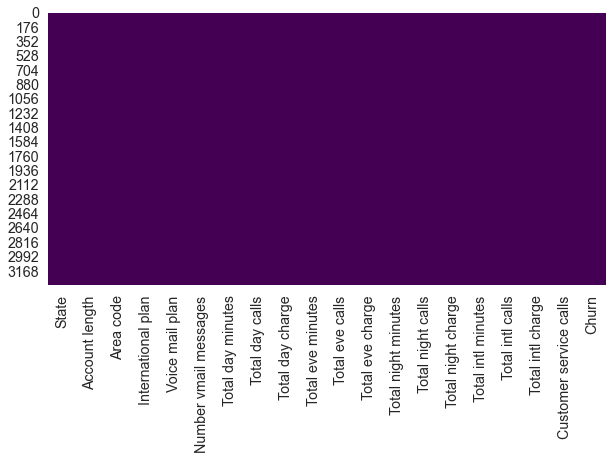

In [23]:
# visualize the missing values with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)

In [24]:
# handling the missing values by using KNN imputer
num=df.select_dtypes(include=['float64','int64'])
for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLOROTORY DATA ANALYSIS (EDA) </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY DATA ANALYSIS (EDA)</center></h1> 

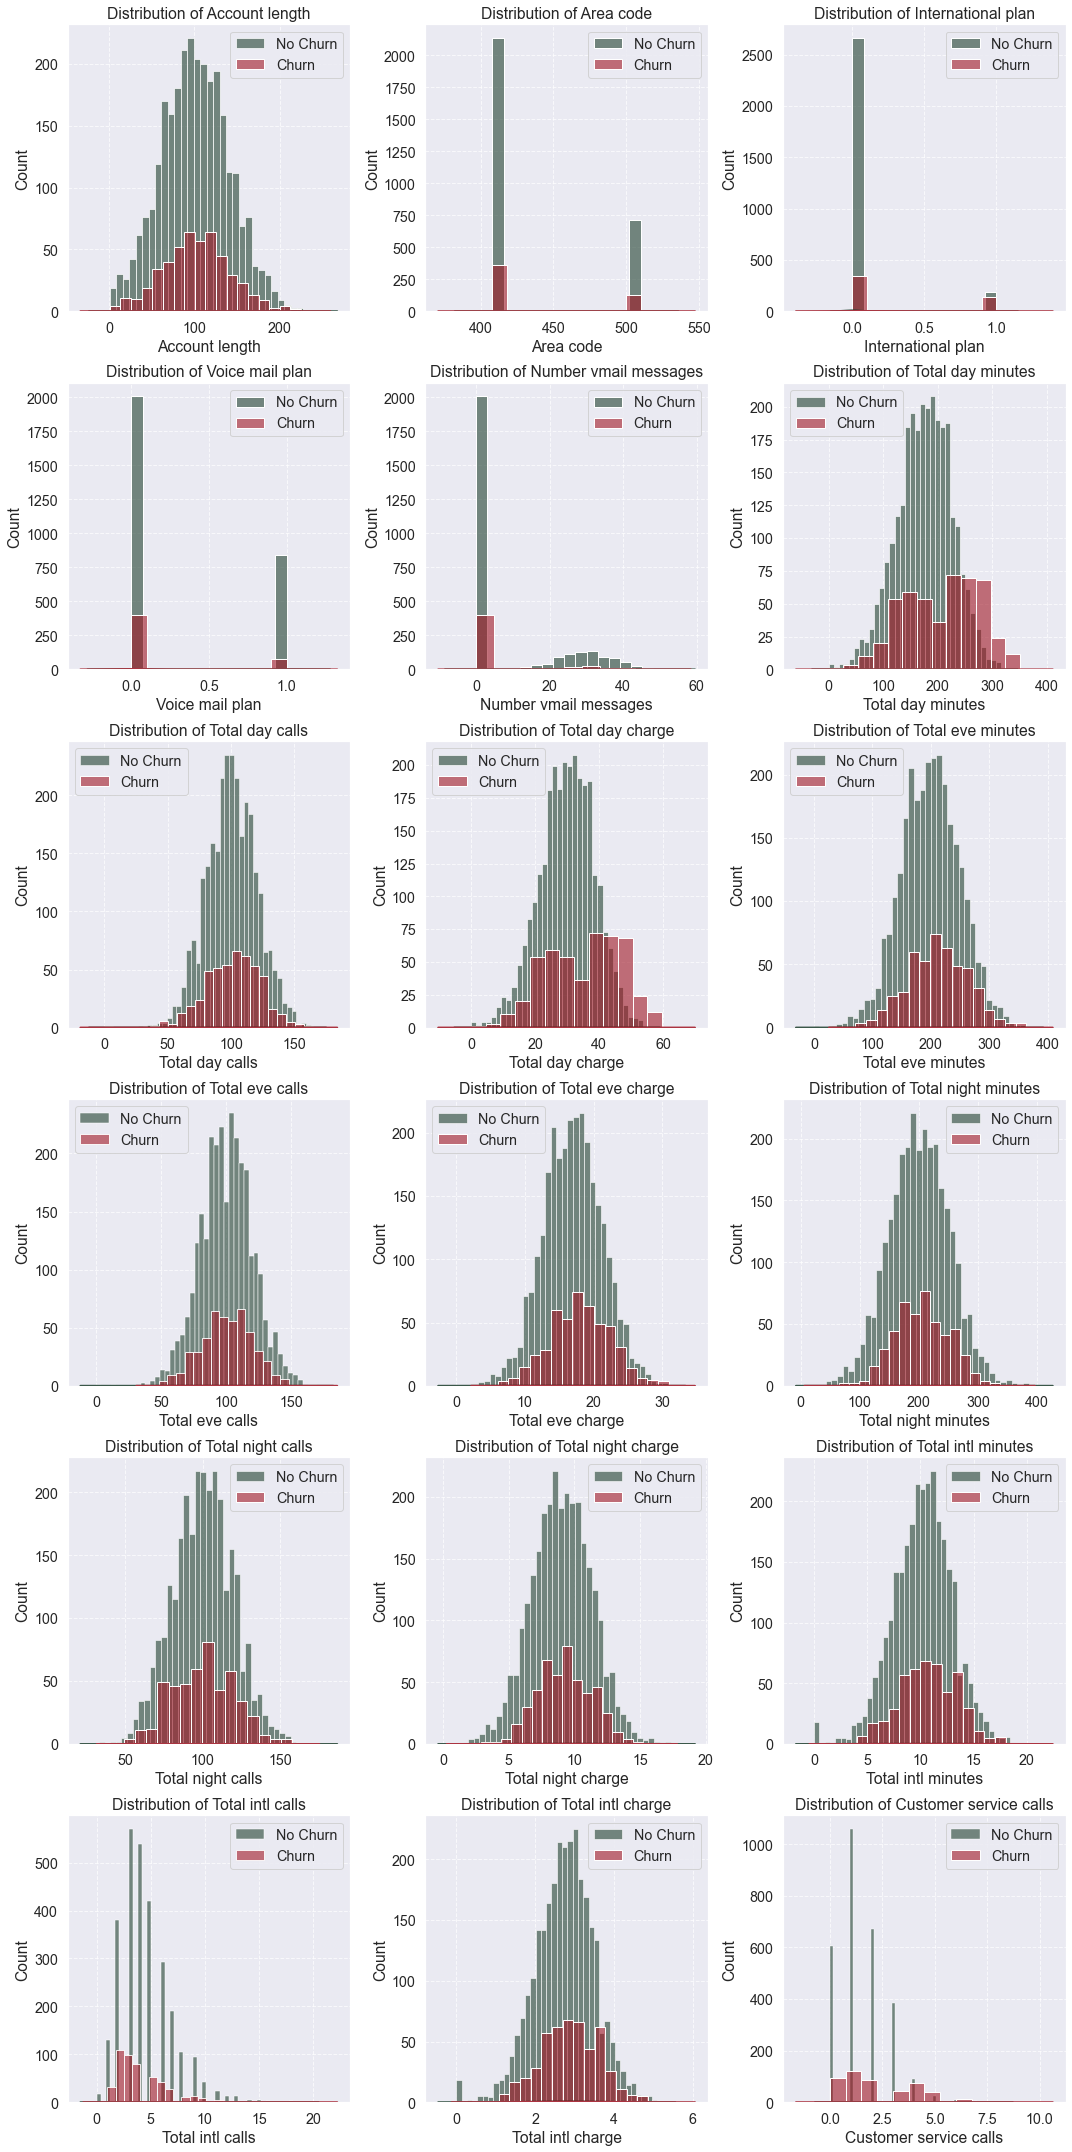

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert columns
cat_cols = ['International plan', 'Voice mail plan']
df[cat_cols] = df[cat_cols].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

# Get clean numerical column names
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'Churn']

# Drop columns with too few unique values (if any)
numerical_columns = [col for col in numerical_columns if df[col].nunique() > 1]

# Initialize subplot grid
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel()

# Plot each distribution
colors = ['#204030', '#a11826']
for idx, col in enumerate(numerical_columns):
    try:
        sns.histplot(df[df['Churn'] == 0][col], color=colors[0], label='No Churn',
                     stat='count', alpha=0.6, ax=axes[idx])
        sns.histplot(df[df['Churn'] == 1][col], color=colors[1], label='Churn',
                     stat='count', alpha=0.6, ax=axes[idx])
        sns.kdeplot(df[df['Churn'] == 0][col], color=colors[0], linewidth=2, ax=axes[idx])
        sns.kdeplot(df[df['Churn'] == 1][col], color=colors[1], linewidth=2, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].legend()
        axes[idx].grid(True, linestyle='--', alpha=0.7)
    except Exception as e:
        print(f"Could not plot {col}: {e}")
        axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


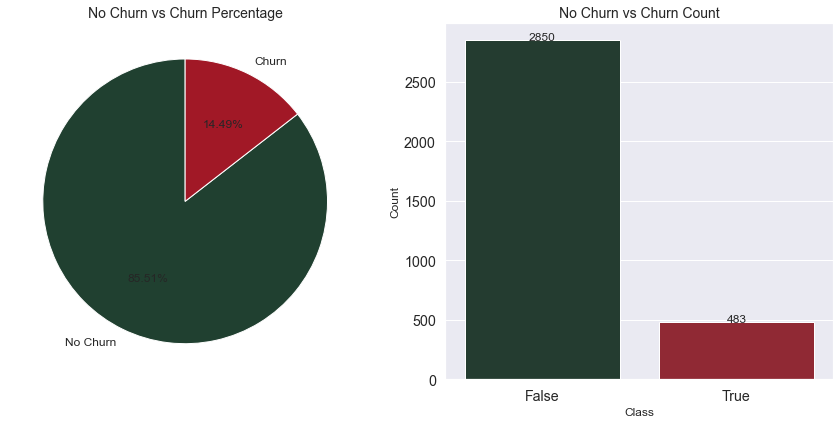

In [34]:
#check for imbalance
#Assess if there is class imbalance in the target variable 'Churn'


# count occurences of each class in the target column
class_counts = data['Churn'].value_counts()

# calculate the percentage of the occurences
percentages = class_counts / len(data) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# pie chart
axes[0].pie(
    percentages, 
    labels=['No Churn', 'Churn'], 
    autopct='%1.2f%%', 
    startangle=90, 
    colors = ['#204030', '#a11826'], 
    textprops={'fontsize': 12}
)
axes[0].set_title('No Churn vs Churn Percentage', fontsize=14)

# bar plot
sns.barplot(
    x=class_counts.index, 
    y=class_counts.values, 
    ax=axes[1], 
    palette=['#204030', '#a11826']
)
for i, count in enumerate(class_counts.values):
    axes[1].text(i, count, f'{count}', ha='center', fontsize=12)
axes[1].set_title('No Churn vs Churn Count', fontsize=14)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


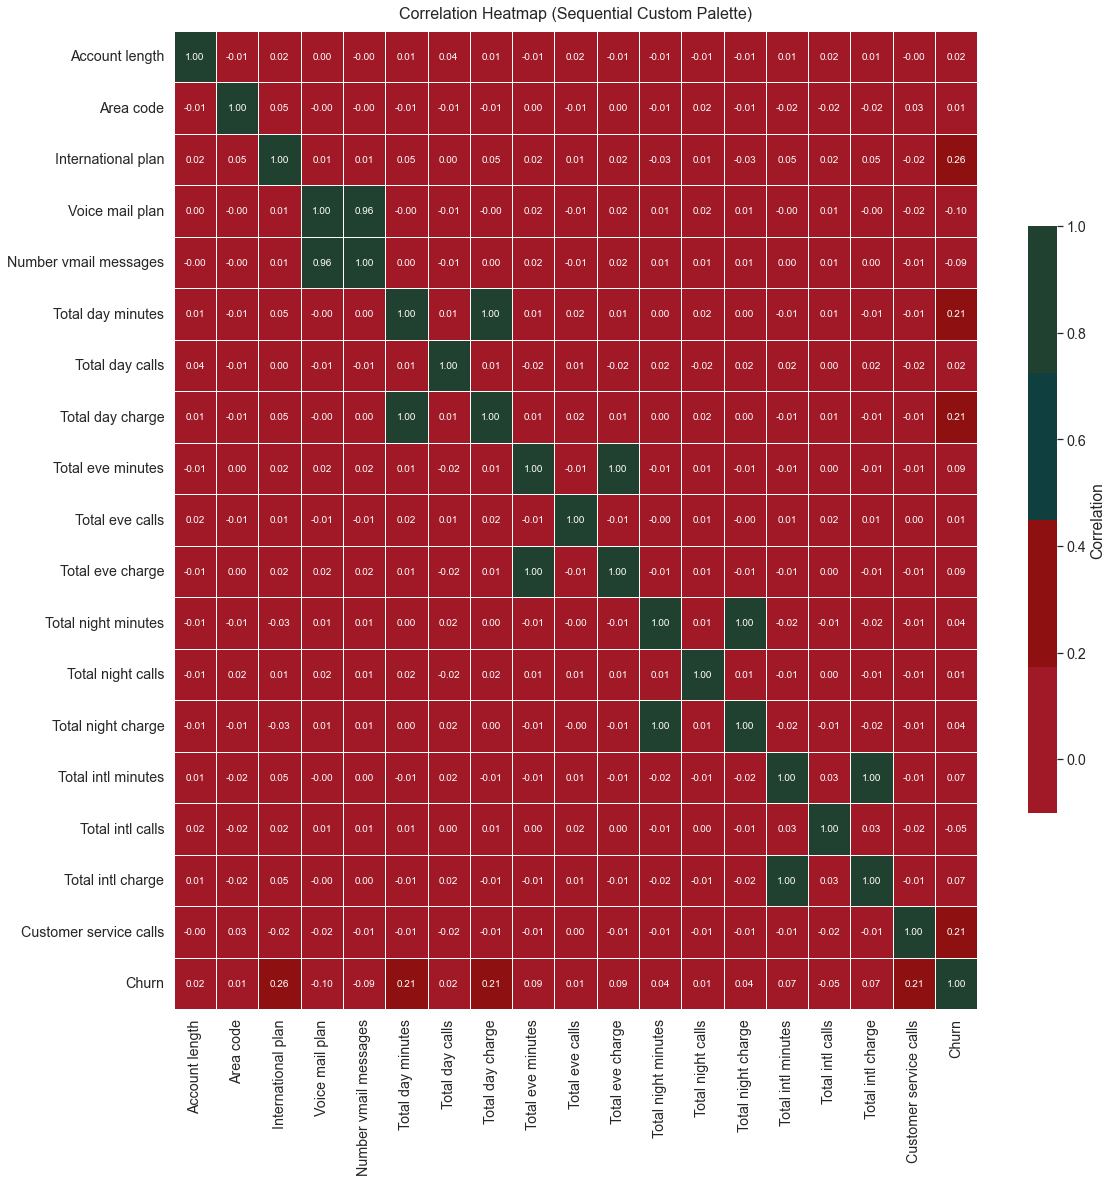

In [40]:
#Check correlation between features
#Examine the correlations among numerical features

# plot correlations 
from matplotlib.colors import ListedColormap

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

custom_seq = ListedColormap(['#a11826', '#8f1010', '#0f403f', '#204030'])

plt.figure(figsize=(18,18))
sns.heatmap(
    corr,
    cmap=custom_seq,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': .6, 'label': 'Correlation'}
)
plt.title('Correlation Heatmap (Sequential Custom Palette)', fontsize=16, pad=12)
plt.show()

                   Feature  MI Score
5        Total day minutes  0.054738
7         Total day charge  0.054674
17  Customer service calls  0.039978
2       International plan  0.023280
3          Voice mail plan  0.011336
4    Number vmail messages  0.011022
1                Area code  0.010936
0           Account length  0.009904
14      Total intl minutes  0.006956
6          Total day calls  0.006861
11     Total night minutes  0.005224
16       Total intl charge  0.002751
9          Total eve calls  0.001176
13      Total night charge  0.000717
15        Total intl calls  0.000245
8        Total eve minutes  0.000000
10        Total eve charge  0.000000
12       Total night calls  0.000000


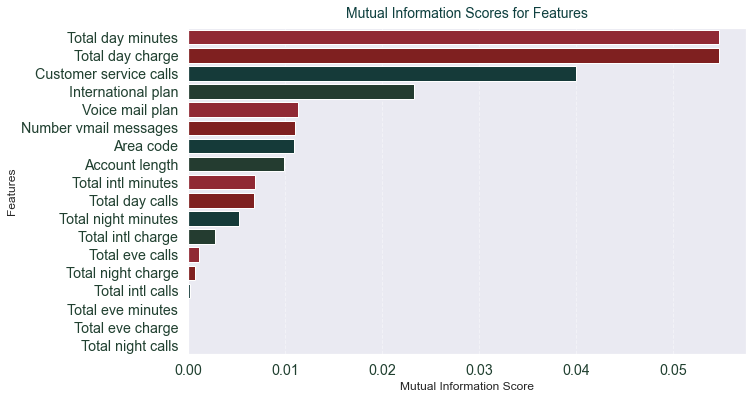

In [45]:
#Mutual Information (MI) Scores
#Calculate Mutual Information (MI) scores to assess the relevance of each feature with respect to the target variable 'Churn'.


# get numeric columns
numerical_columns = df.select_dtypes(include=['number']).columns

# compute mutual information
mi = mutual_info_classif(df[numerical_columns].drop('Churn', axis=1), df['Churn'], random_state=42)

# create a dataframe to display MI scores
mi_scores = pd.DataFrame({'Feature': numerical_columns.drop('Churn'), 'MI Score': mi})
mi_scores = mi_scores.sort_values(by='MI Score', ascending=False)

# Print mutual information scores
print(mi_scores)

# Define custom palette (can repeat to match # of features)
custom_palette = ['#a11826', '#8f1010', '#0f403f', '#204030'] * (len(mi_scores) // 5 + 1)

# Plot barplot with custom theme
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_scores, x='MI Score', y='Feature', palette=custom_palette[:len(mi_scores)])
plt.title('Mutual Information Scores for Features', fontsize=14, pad=10, color='#0f403f')
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xticks(color='#204030')
plt.yticks(color='#204030')
plt.show()




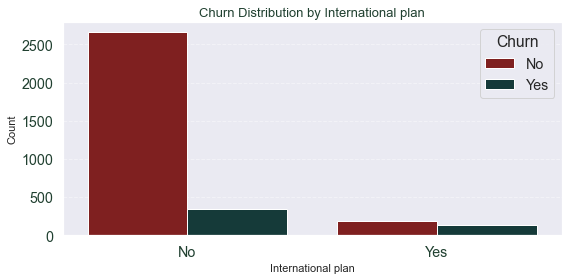

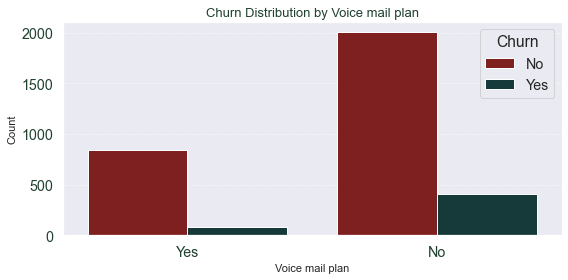

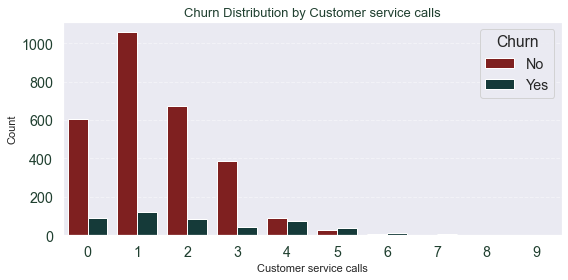

In [46]:
#Churn distribution of some important features
#Analyze how the distribution of important features varies with churn status.

# Set custom palette for binary class (Churn)
sns.set_palette(['#8f1010', '#0f403f'])

features = ['International plan', 'Voice mail plan', 'Customer service calls']

for feature in features:
    plt.figure(figsize=(8, 4))  
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f"Churn Distribution by {feature}", fontsize=13, color='#204030')
    plt.xlabel(feature, fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.xticks(color='#204030')
    plt.yticks(color='#204030')
    plt.tight_layout()
    plt.show()


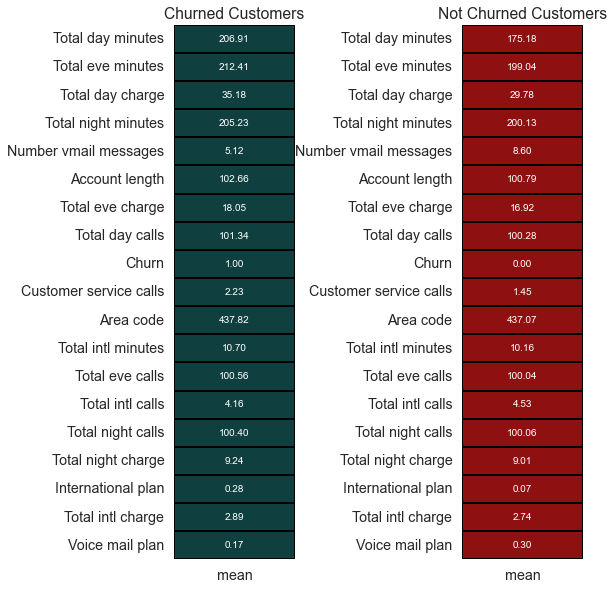

In [48]:
#Mean feature values by churn status
#Compare the mean values of features for churned and non-churned customers


# calculate mean values for churned and not churned customers
Churned = df[df['Churn'] == 1].describe().T
Not_Churned = df[df['Churn'] == 0].describe().T

# Calculate the absolute difference in means between the two groups 
diff_means = abs(Churned['mean'] - Not_Churned['mean'])

# sorth them based on the absolute difference
Churned = Churned.loc[diff_means.sort_values(ascending=False).index]
Not_Churned = Not_Churned.loc[diff_means.sort_values(ascending=False).index]

colors_churned = '#0f403f'  
colors_not_churned = '#8f1010'  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

sns.heatmap(Churned[['mean']], annot=True, cmap=[colors_churned], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Churned Customers')

sns.heatmap(Not_Churned[['mean']], annot=True, cmap=[colors_not_churned], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('Not Churned Customers')

fig.tight_layout(pad=0)
plt.show()

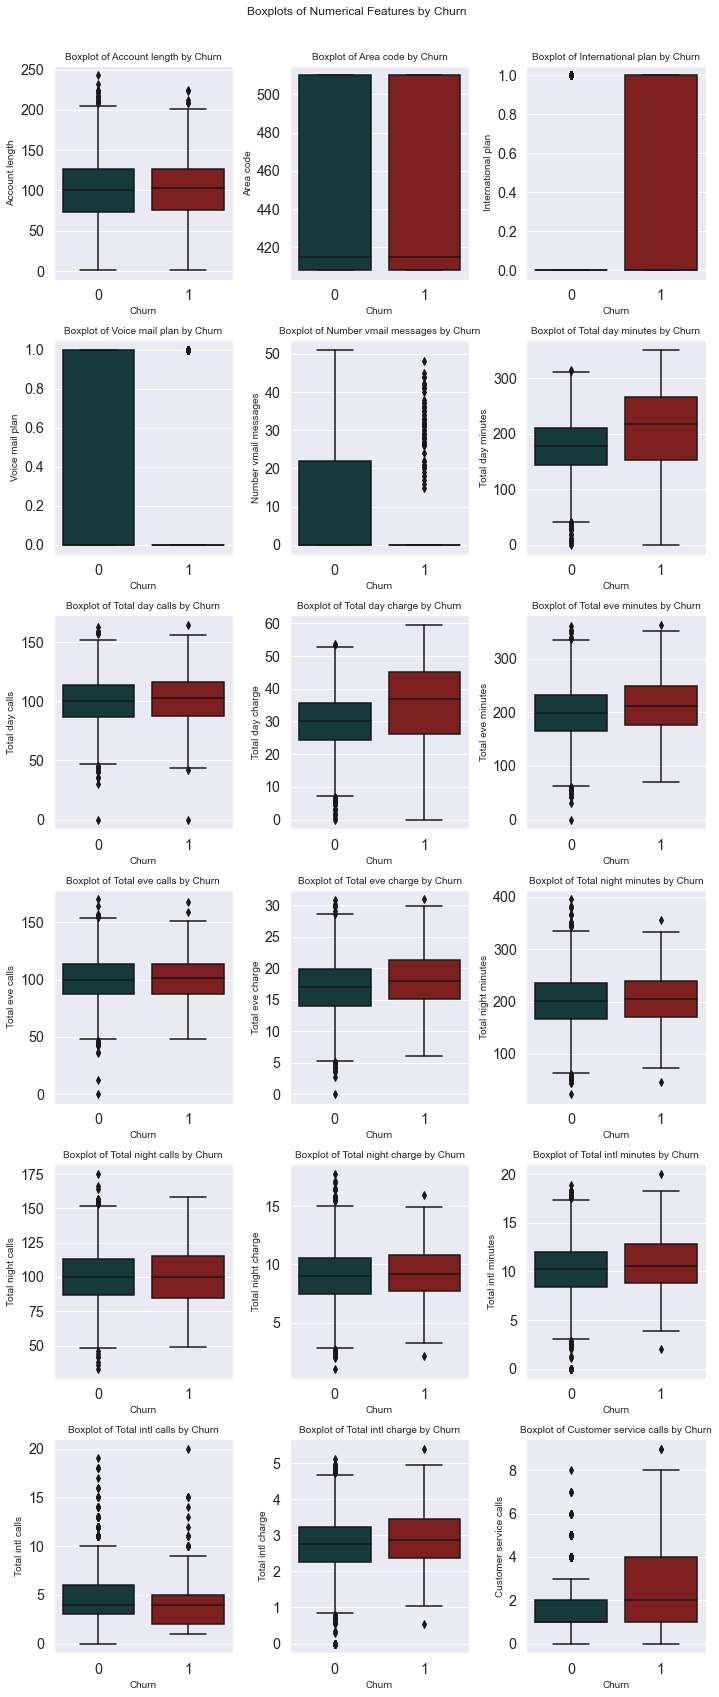

In [50]:
#check for outliers
#identify outliers in numerical features using box plots and the IQR method


# features to plot
features = numerical_columns.drop('Churn')

# columns and rows needed
num_features = len(features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 4))


axes = axes.flatten()
# iterate through features and create boxplots
for i, feature in enumerate(features):
    sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i], palette=['#0f403f', '#8f1010'])
    axes[i].set_title(f'Boxplot of {feature} by Churn', fontsize=10)
    axes[i].set_xlabel('Churn', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])

fig.suptitle('Boxplots of Numerical Features by Churn', fontsize=12)

plt.show()


In [51]:
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)


exclude_columns = ['Area code', 'International plan', 'Voice mail plan', 'State', 'Churn']

columns_to_analyze = [col for col in data.columns if col not in exclude_columns]

# find outliers in each column
for col in columns_to_analyze:
    outliers = data[find_outliers(data[col])]
    print(f"Outliers in {col}:")
    print(outliers[col].values)
    print("-----------------------------------") 

Outliers in Account length:
[209 224 243 210 212 225 225 224 212 210 217 221 208 215 217 232 209 209]
-----------------------------------
Outliers in Number vmail messages:
[51]
-----------------------------------
Outliers in Total day minutes:
[337.4 350.8 335.5  30.9  34.  346.8  12.5   0.    0.   19.5 329.8   7.9
 328.1  27.   17.6 326.3 345.3   2.6   7.8  18.9  29.9 332.9 326.5 334.3
  25.9]
-----------------------------------
Outliers in Total day calls:
[158  36  40 158  42   0  45   0  45 160 156  42 158 157  45  44  44  44
 163 165  30  35  40]
-----------------------------------
Outliers in Total day charge:
[57.36 59.64 57.04  5.25  5.78 58.96  2.13  0.    0.    3.32 56.07  1.34
 55.78  4.59  2.99 55.47 58.7   0.44  1.33  3.21  5.08 56.59 55.51 56.83
  4.4 ]
-----------------------------------
Outliers in Total eve minutes:
[ 61.9 348.5  31.2  42.2 347.3  58.9  43.9  52.9  42.5  58.6  56.  350.9
  49.2 339.9 354.2 363.7   0.  341.3 351.6 350.5  60.8  48.1  60.  361.8]
-------

In [52]:
# Checking importance of categorical feature
# Chi-square test to assess the importance of the categorical feature 'State' in predicting churn

# Chi-square test of independence
contingency_table = pd.crosstab(df['State'], df['Churn'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("'State' might be an important predictor of churn.")
else:
    print("'State' might not be a strong predictor of churn.")




Chi-square test p-value: 0.0023
'State' might be an important predictor of churn.


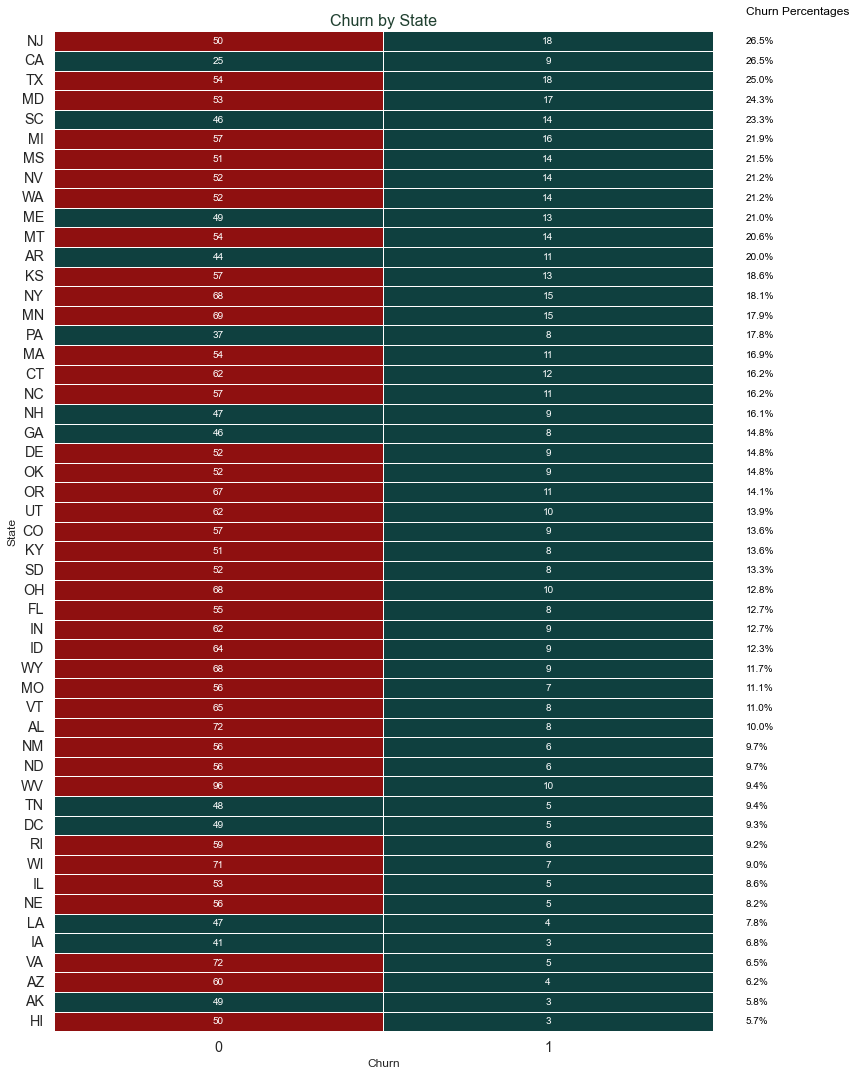

In [54]:
from matplotlib.colors import ListedColormap

# Custom binary color palette (Churn: Yes/No)
custom_cmap = ListedColormap(['#0f403f', '#8f1010'])

# Contingency table: count of churned/not churned in each state
contingency_table = pd.crosstab(data['State'], df['Churn'])

# Calculate churn rates
churn_rates = contingency_table[1] / contingency_table.sum(axis=1)

# Sort by churn rate
sorted_indices = churn_rates.sort_values(ascending=False).index
contingency_table = contingency_table.loc[sorted_indices]
churn_rates = churn_rates.loc[sorted_indices]

# Plot
plt.figure(figsize=(12, 15))
sns.heatmap(
    contingency_table, 
    annot=True, 
    fmt="d", 
    cmap=custom_cmap, 
    linewidths=0.5, 
    cbar=False, 
    linecolor='white'
)
plt.title("Churn by State", fontsize=16, color='#204030')
plt.xlabel("Churn", fontsize=12)
plt.ylabel("State", fontsize=12)

# Annotate churn percentages beside the heatmap
for i in range(len(churn_rates)):
    plt.text(2.1, i + 0.5, f"{churn_rates[i]*100:.1f}%", 
             va='center', ha='left', color='black', fontsize=10)

# Header for annotation
plt.text(2.1, -1, 'Churn Percentages', va='center', ha='left', color='black', fontsize=12)

plt.tight_layout()
plt.show()


Conclusions of Exploratory Data Analysis (EDA) 
The exploratory analysis of the telecom churn dataset provided several valuable insights that shaped my modeling strategy

* Data Quality and Completeness- The dataset is clean and complete, with no missing values or duplicate records detected. This allows for smooth preprocessing without the need for imputation or deduplication.

* Variable Distributions - Most numerical features exhibit approximately normal or right-skewed distributions, which are suitable for modeling. This includes variables like Total day minutes, Total charge, and Customer service calls.

* Feature Scale Variation - Features in the dataset exist on vastly different scales (e.g., number of calls vs. total charges), indicating that scaling or normalization may be necessary for certain algorithms, especially those sensitive to scale such as Logistic Regression.

* Class Imbalance - The target variable Churn shows a strong imbalance, with the majority of customers being non-churners. This imbalance could lead to biased model performance, especially in classification tasks. Therefore, techniques like Stratified Sampling and class weights were considered to mitigate this issue.

* Multicollinearity Observed - Certain pairs of variables (e.g., Total day minutes and Total day charge) are highly correlated, indicating multicollinearity. These variables are mathematically related (charges = minutes × rate), and models like Logistic Regression may require dropping one of the correlated features to prevent redundancy.

* Churn Behavior Patterns - Customers who use more services and incur higher charges tend to churn at higher rates. This suggests that overutilization or dissatisfaction with pricing structures may be key drivers of churn.

* Geographic Influence - The State variable demonstrates a clear influence on churn patterns, with certain states exhibiting significantly higher churn rates than others. This may reflect differences in service availability, competition, or regional customer preferences.

* Presence of Outliers - While some outliers were detected (e.g., unusually high service call counts or charges), these are considered valid customer behaviors rather than data errors. They were retained in the dataset to preserve the integrity and realism of customer diversity.

<a id='7'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA VISUALIZATION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>DATA PREPROCESSING</center></h1> 



In [ ]:
# Handling multicollinearity

# drop multicollinear features
columns = ['Total intl minutes', 'Total day minutes', 'Total night minutes', 'Total eve minutes']
df.drop(columns, axis = 1, inplace = True)

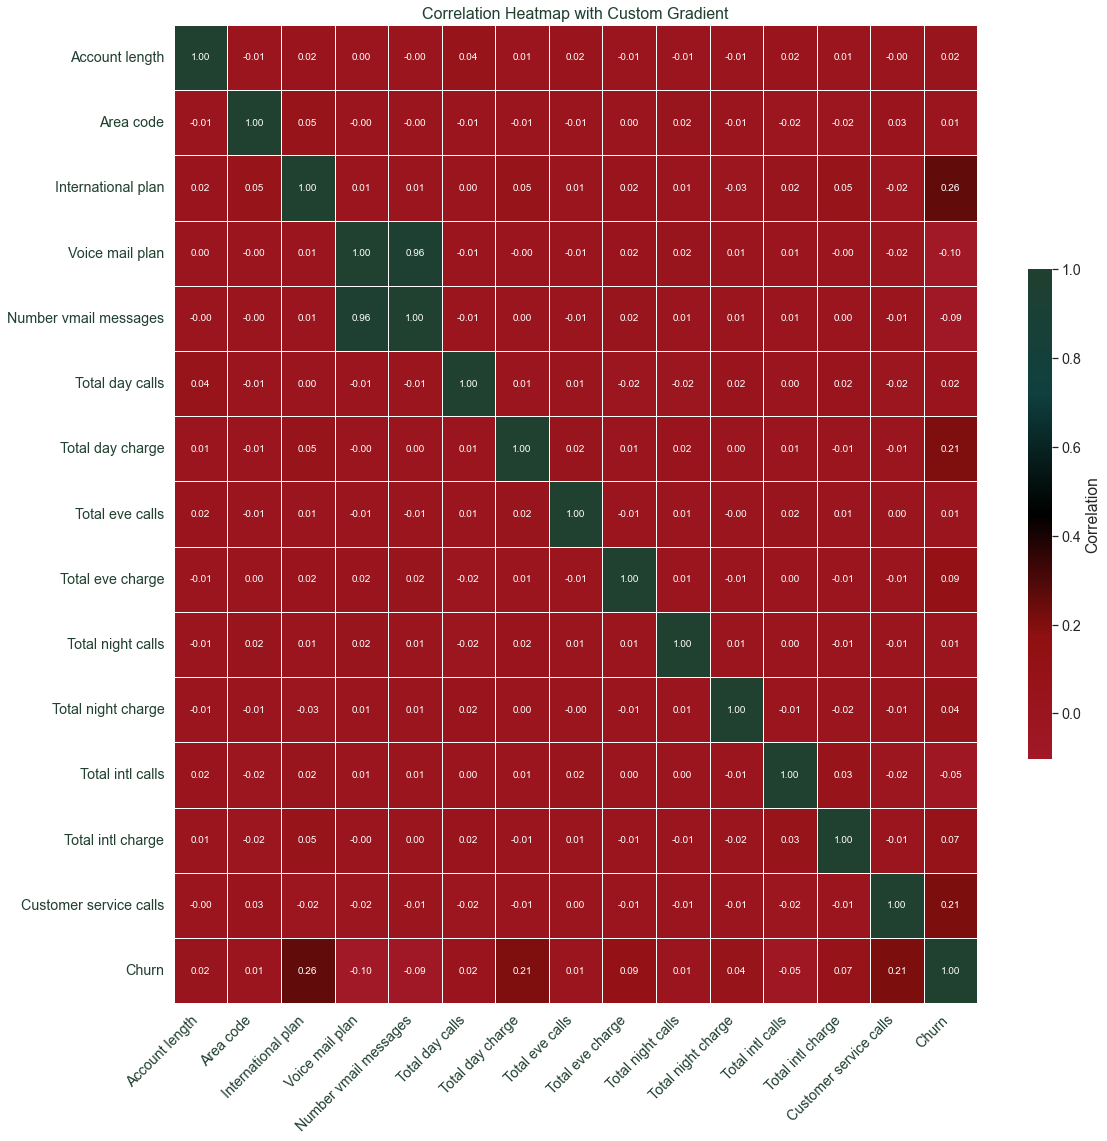

In [63]:
# plot correlations 
from matplotlib.colors import LinearSegmentedColormap

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Step 2: Define a custom gradient colormap from your palette
custom_colors = ['#a11826', '#8f1010', '#000000', '#0f403f', '#204030']
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors, N=256)

# Step 3: Plot the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=custom_cmap,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.5, 'label': 'Correlation'}
)
plt.title("Correlation Heatmap with Custom Gradient", fontsize=16, color='#204030')
plt.xticks(rotation=45, ha='right', color='#204030')
plt.yticks(rotation=0, color='#204030')
plt.show()

In [64]:
#One Hot encode categorical column Area code
#one hot encoding selected because of no ordinal relationships existing

df = pd.get_dummies(df, columns=['Area code'], prefix=['Area_code'])


In [65]:
#split data

X = df.drop('Churn', axis=1)
y = df['Churn']

# splitting the data into training and test sets, stratifying by the target variable 'Churn'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [66]:
# target encode categorical column State
# target encoding selected for 'State' column because of its high cardinality

# compute mean churn rate per state in the training set
state_mean_churn = X_train.join(y_train).groupby('State')['Churn'].mean()

# apply encoding to training data
X_train['state_encoded'] = X_train['State'].map(state_mean_churn)

# apply encoding to test data 
X_test['state_encoded'] = X_test['State'].map(state_mean_churn)

# drop original `State` column as it is now encoded
X_train.drop('State', axis=1, inplace=True)
X_test.drop('State', axis=1, inplace=True)

In [72]:
# Logistic Regression (with class_weight)

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [73]:
# Random Forest (with class_weight)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [74]:
# Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [76]:
from sklearn.utils import resample

# Combine X and y
data_combined = pd.concat([X_train, y_train], axis=1)

# Separate classes
churned = data_combined[data_combined['Churn'] == 1]
non_churned = data_combined[data_combined['Churn'] == 0]

# Downsample majority class
non_churned_downsampled = resample(non_churned, 
                                   replace=False, 
                                   n_samples=len(churned), 
                                   random_state=42)

# Combine
downsampled_data = pd.concat([churned, non_churned_downsampled])
X_train = downsampled_data.drop('Churn', axis=1)
y_train = downsampled_data['Churn']


<a id='8'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> OUTLIER DETECTION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>MODEL BUILDING AND EVALUATION</center></h1> 

In [77]:
def tune_and_evaluate_models(X_train, y_train, X_test, y_test, models, param_grids, cv, dataset_name):
    """
    Tune models using GridSearchCV and evaluate on test data
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    - models: Dictionary of models to tune
    - param_grids: Dictionary of parameter grids for each model
    - cv: Cross-validation strategy
    - dataset_name: String to identify the dataset (e.g., 'Unbalanced', 'Balanced')
    
    Returns:
    - Dictionary of results for each model
    """
    # Dictionary to store results
    results = {}
    
    # Metrics to calculate
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1 Score': f1_score,
        'ROC AUC': roc_auc_score
    }
    
    # Tune and evaluate each model
    for name, model in models.items():
        print(f"\n--- Tuning {name} on {dataset_name} Dataset ---")
        
        # Perform Grid Search
        grid = GridSearchCV(
            model, 
            param_grids[name], 
            cv=cv, 
            scoring='roc_auc', 
            n_jobs=-1, 
            verbose=1
        )
        grid.fit(X_train, y_train)
        
        # Get best model
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        
        # Predictions
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        model_metrics = {}
        for metric_name, metric_func in metrics.items():
            if metric_name in ['Precision', 'Recall', 'F1 Score']:
                model_metrics[metric_name] = metric_func(y_test, y_pred, average='weighted')
            elif metric_name == 'ROC AUC':
                try:
                    model_metrics[metric_name] = metric_func(y_test, y_pred_proba)
                except ValueError:
                    model_metrics[metric_name] = "Not applicable"
            else:
                model_metrics[metric_name] = metric_func(y_test, y_pred)
        
        # Store results
        results[name] = {
            'Best Model': best_model,
            'Best Params': best_params,
            'Metrics': model_metrics,
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred),
            'y_pred_proba': y_pred_proba 
        }
    
    return results

In [79]:
from sklearn.tree import DecisionTreeClassifier


In [83]:
# Cross-Validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grids 
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2'],
    },
    'DecisionTree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
}

# models to evaluate
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42)
}

# calculate the scale_pos_weight based on the class imbalance in training set
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1] 

# models with weighted loss for imbalance handling
models_weighted_loss = {
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced')
}


<a id='11'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">PCA / PRINCIPAL COMPONENT ANALYSIS</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>DATA IMBALANCE</center></h1> 

In [90]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

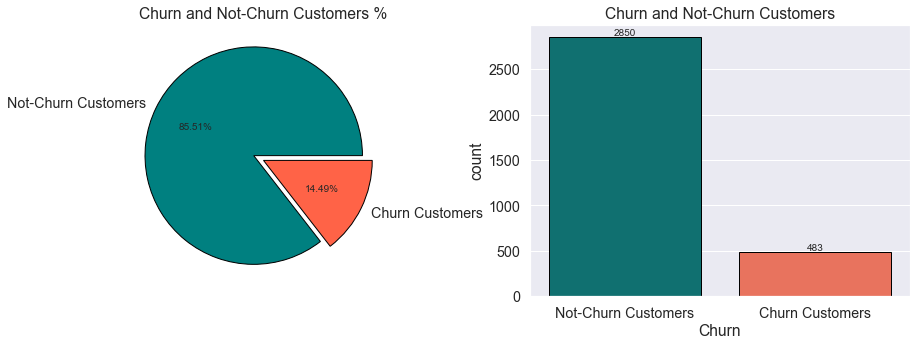

In [93]:
l1 = list(df['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df, 
                   x='Churn',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()

<a id='11'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">PCA / PRINCIPAL COMPONENT ANALYSIS</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>DISTRIBUTION</center></h1> 

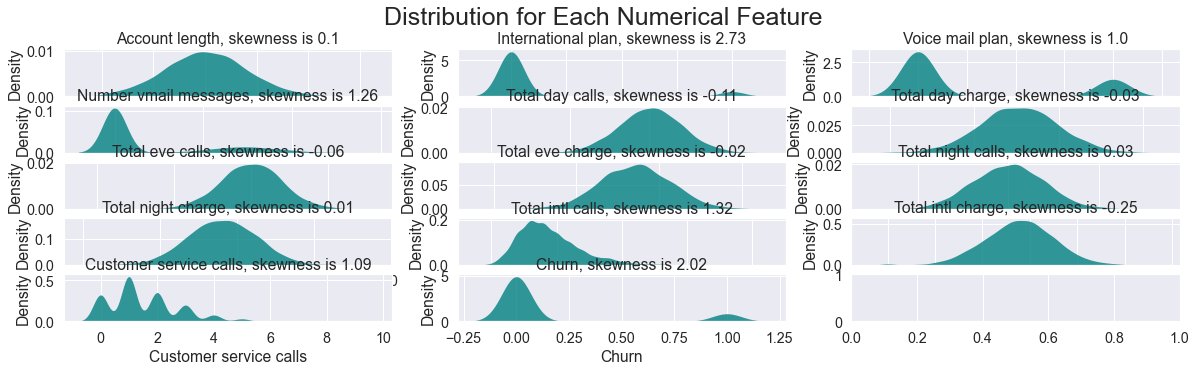

In [98]:
# Numerical features distibution
import math

# Calculate number of plots
n_features = len(numeric_columns)
n_cols = 3  
n_rows = math.ceil(n_features / n_cols)

# Call the function with dynamic rows/cols
dist_custom(
    dataset=df,
    columns_list=numeric_columns,
    rows=n_rows,
    cols=n_cols,
    suptitle='Distribution for Each Numerical Feature'
)

plt.tight_layout()


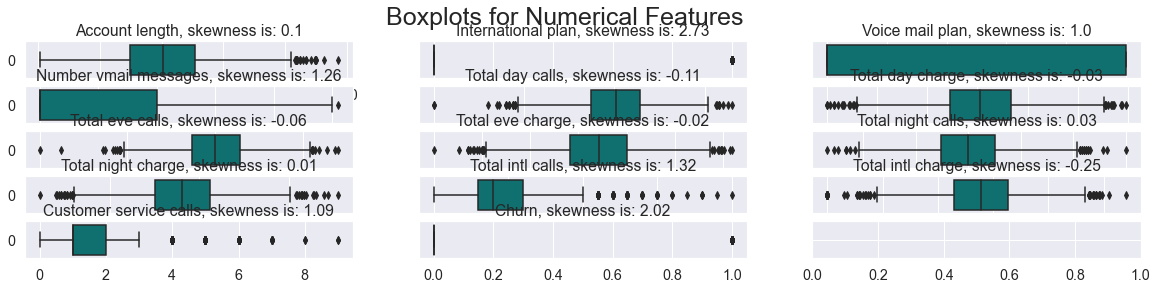

In [105]:
#Numerical features boxplot

import math

# Count how many features you want to plot
n_features = len(numeric_columns)

# Set number of columns you'd like
n_cols = 3  
n_rows = math.ceil(n_features / n_cols)

# Then call the function using these values
boxplots_custom(
    dataset=df,
    columns_list=numeric_columns,
    rows=n_rows,
    cols=n_cols,
    suptitle='Boxplots for Numerical Features'
)

plt.tight_layout()


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Numerical Features by Churn and not Churn</center></h1> 

In [108]:
print(df.columns.tolist())


['State', 'Account length', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn', 'Area_code_408.0', 'Area_code_415.0', 'Area_code_510.0']


In [114]:
df['Total charge'] = (
    df['Total day charge'] +
    df['Total eve charge'] +
    df['Total night charge'] +
    df['Total intl charge']
)
print(df[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Total charge']].head())


   Total day charge  Total eve charge  Total night charge  Total intl charge  \
0             45.07             16.78               11.01               2.70   
1             27.47             16.62               11.45               3.70   
2             41.38             10.30                7.32               3.29   
3             50.90              5.26                8.86               1.78   
4             28.34             12.61                8.41               2.73   

   Total charge  
0         75.56  
1         59.24  
2         62.29  
3         66.80  
4         52.09  


In [115]:
df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Area_code_408.0,Area_code_415.0,Area_code_510.0,Total charge
0,KS,128.0,0,1,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,0,0,1,0,75.56
1,OH,107.0,0,1,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0,0,1,0,59.24
2,NJ,137.0,0,0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0,0,1,0,62.29
3,OH,84.0,1,0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,0,1,0,0,66.80
4,OK,75.0,1,0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,0,0,1,0,52.09


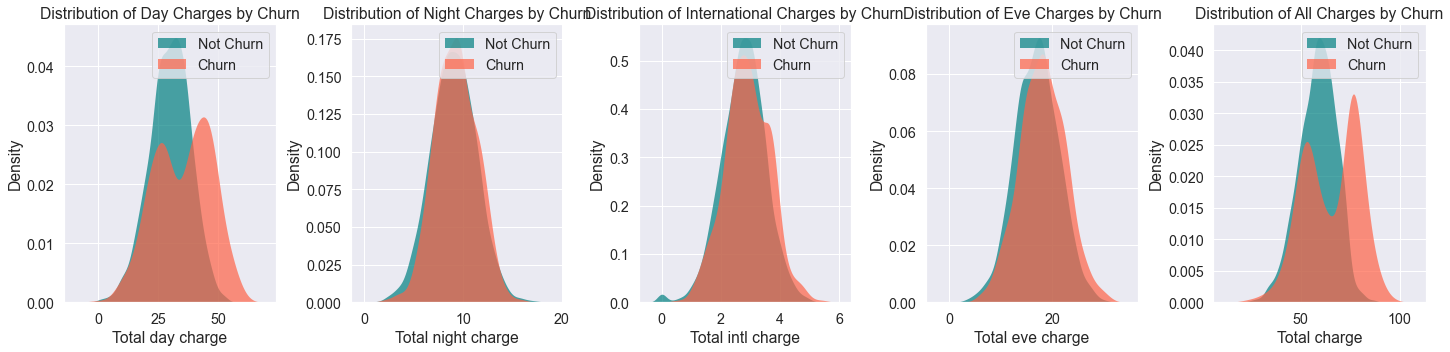

In [122]:
# Monthly Charges and Total Charges
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
ax = sns.kdeplot(df[df["Churn"] == 0]['Total day charge'], color='#008080', fill=True, alpha=0.7, linewidth=0)
ax = sns.kdeplot(df[df["Churn"] == 1]['Total day charge'], color='#FF6347', fill=True, alpha=0.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
plt.title("Distribution of Day Charges by Churn")


plt.subplot(1, 5, 2)
ax = sns.kdeplot(df[df["Churn"] == 0]['Total night charge'], color='#008080', fill=True, alpha=0.7, linewidth=0)
ax = sns.kdeplot(df[df["Churn"] == 1]['Total night charge'], color='#FF6347', fill=True, alpha=0.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
plt.title("Distribution of Night Charges by Churn")


plt.subplot(1, 5, 3)
ax = sns.kdeplot(df[df["Churn"] == 0]['Total intl charge'], color='#008080', fill=True, alpha=0.7, linewidth=0)
ax = sns.kdeplot(df[df["Churn"] == 1]['Total intl charge'], color='#FF6347', fill=True, alpha=0.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
plt.title("Distribution of International Charges by Churn")


plt.subplot(1, 5, 4)
ax = sns.kdeplot(df[df["Churn"] == 0]['Total eve charge'], color='#008080', fill=True, alpha=0.7, linewidth=0)
ax = sns.kdeplot(df[df["Churn"] == 1]['Total eve charge'], color='#FF6347', fill=True, alpha=0.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
plt.title("Distribution of Eve Charges by Churn")


plt.subplot(1, 5, 5)
ax = sns.kdeplot(df[df["Churn"] == 0]['Total charge'], color='#008080', fill=True, alpha=0.7, linewidth=0)
ax = sns.kdeplot(df[df["Churn"] == 1]['Total charge'], color='#FF6347', fill=True, alpha=0.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
plt.title("Distribution of All Charges by Churn")


plt.tight_layout()
plt.show()


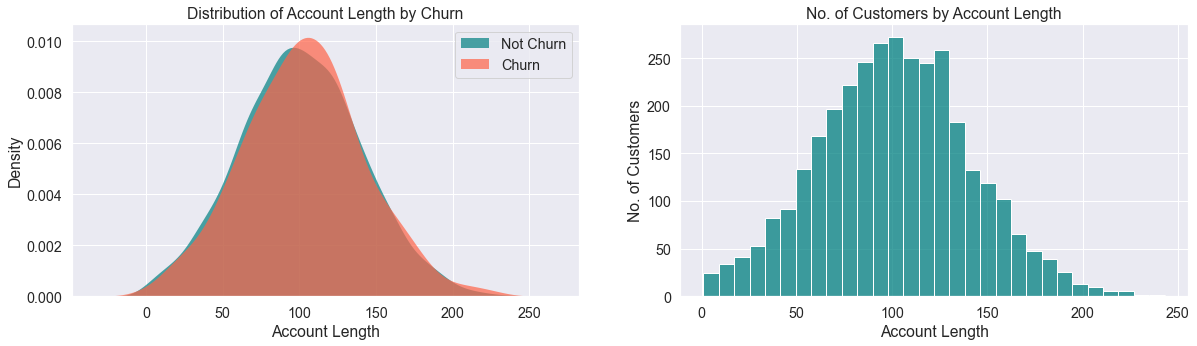

In [124]:
# Account Length

fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
ax = sns.kdeplot(df[df["Churn"] == 0]['Account length'], color='#008080', fill=True, alpha=0.7, linewidth=0)
ax = sns.kdeplot(df[df["Churn"] == 1]['Account length'], color='#FF6347', fill=True, alpha=0.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Account Length')
ax.set_title('Distribution of Account Length by Churn')

plt.subplot(1, 2, 2)
ax = sns.histplot(df["Account length"], bins=30, kde=False, color='#008080')
ax.set(title="No. of Customers by Account Length")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Account Length')

plt.show()

In [125]:
# Contract

# Define contract categories based on account length
def map_contract(account_length):
    if account_length < 60:
        return 'Month-to-Month'
    elif 60 <= account_length < 120:
        return 'One Year'
    else:
        return 'Two Year'

df['Contract'] = df['Account length'].apply(map_contract)


| Account Length (Days/Months?) | Assumed Contract Type |
| ----------------------------- | --------------------- |
| `< 60`                        | Month-to-Month        |
| `60 - 119`                    | One Year              |
| `≥ 120`                       | Two Year              |


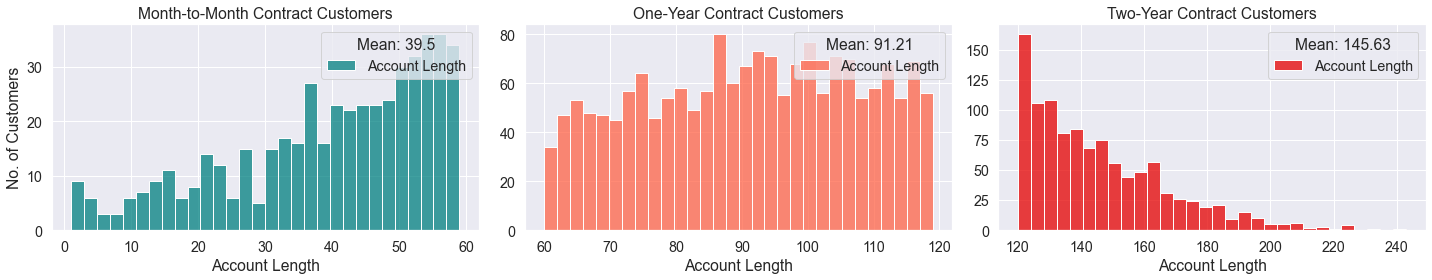

In [126]:
# Compute mean account length for each contract group
two_year_mean = round(df[df['Contract'] == 'Two Year']['Account length'].mean(), 2)
month_mean = round(df[df['Contract'] == 'Month-to-Month']['Account length'].mean(), 2)
year_mean = round(df[df['Contract'] == 'One Year']['Account length'].mean(), 2)

fig = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

plt.subplot(1, 3, 1)
ax = sns.histplot(df[df['Contract'] == 'Month-to-Month']['Account length'], bins=30, color='#008080')
ax.legend(['Account Length'], loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Account Length')
ax.set_title('Month-to-Month Contract Customers')

plt.subplot(1, 3, 2)
ax = sns.histplot(df[df['Contract'] == 'One Year']['Account length'], bins=30, color='#FF6347')
ax.legend(['Account Length'], loc='upper right', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Account Length')
ax.set_title('One-Year Contract Customers')

plt.subplot(1, 3, 3)
ax = sns.histplot(df[df['Contract'] == 'Two Year']['Account length'], bins=30, color='#E50000')
ax.legend(['Account Length'], loc='upper right', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Account Length')
ax.set_title('Two-Year Contract Customers')

plt.tight_layout()
plt.show()


In [128]:
# Scatter plot by Total Charge, Monthly Charge and Tenure

df['Total Charge'] = (
    df['Total day charge'] +
    df['Total eve charge'] +
    df['Total night charge'] +
    df['Total intl charge']
)
df['Monthly Charge'] = df['Total Charge'] / df['Account length']
df['Monthly Charge'] = df['Monthly Charge'].replace([np.inf, -np.inf], np.nan).fillna(0)

df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Area_code_408.0,Area_code_415.0,Area_code_510.0,Total charge,Contract,Total Charge,Monthly Charge
0,KS,128.0,0,1,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,0,0,1,0,75.56,Two Year,75.56,0.590313
1,OH,107.0,0,1,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0,0,1,0,59.24,One Year,59.24,0.553645
2,NJ,137.0,0,0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0,0,1,0,62.29,Two Year,62.29,0.454672
3,OH,84.0,1,0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,0,1,0,0,66.80,One Year,66.80,0.795238
4,OK,75.0,1,0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,0,0,1,0,52.09,One Year,52.09,0.694533


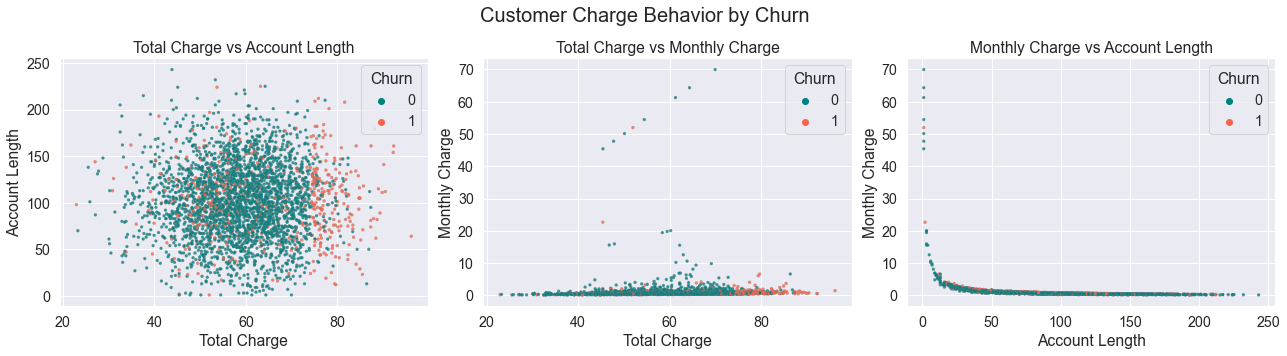

In [129]:
palette2 = ['#008080', '#FF6347']

fig = plt.figure(figsize=(18, 5))

# Plot 1: Total Charge vs Account Length
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='Total Charge', y='Account length', hue='Churn',
    data=df, palette=palette2, edgecolor='grey', alpha=0.8, s=9
)
plt.title('Total Charge vs Account Length')
plt.xlabel('Total Charge')
plt.ylabel('Account Length')

# Plot 2: Total Charge vs Monthly Charge
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='Total Charge', y='Monthly Charge', hue='Churn',
    data=df, palette=palette2, edgecolor='grey', alpha=0.8, s=9
)
plt.title('Total Charge vs Monthly Charge')
plt.xlabel('Total Charge')
plt.ylabel('Monthly Charge')

# Plot 3: Monthly Charge vs Account Length
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='Account length', y='Monthly Charge', hue='Churn',
    data=df, palette=palette2, edgecolor='grey', alpha=0.8, s=9
)
plt.title('Monthly Charge vs Account Length')
plt.xlabel('Account Length')
plt.ylabel('Monthly Charge')

fig.suptitle('Customer Charge Behavior by Churn', fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
# NumAdminTickets and NumTechTickets

In [131]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding 'Churn' column
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes/No → 1/0


In [132]:
cat_columns = ['International plan', 'Voice mail plan']  # or whatever your categorical columns are

le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])


In [133]:
df3=df
df3[['Churn']] = df3[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df3.drop('Churn', axis=1)
y = df3['Churn']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

In [136]:
from sklearn.preprocessing import StandardScaler

# Remove 'Churn' from numeric_columns if it's mistakenly included
numeric_columns = [col for col in numeric_columns if col != 'Churn']

# Initialize and apply scaler
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [138]:
print(numeric_columns)

['Account length', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [140]:
categoric_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print(categoric_columns)


['State', 'Contract']


In [141]:
categoric_columns = ['State', 'International plan', 'Voice mail plan'] 
print(categoric_columns)


['State', 'International plan', 'Voice mail plan']


In [143]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Create the column transformer for only categorical columns
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
     ['State', 'International plan', 'Voice mail plan']),
    remainder='passthrough'  # keeps all other columns untouched
)


In [147]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

In [148]:
print(X_train.columns)

Index(['State', 'Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day calls', 'Total day charge',
       'Total eve calls', 'Total eve charge', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Area_code_408.0', 'Area_code_415.0',
       'Area_code_510.0', 'Total charge', 'Contract', 'Total Charge',
       'Monthly Charge'],
      dtype='object')


In [149]:
X_train.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Area_code_408.0,Area_code_415.0,Area_code_510.0,Total charge,Contract,Total Charge,Monthly Charge
546,NH,-1.625780,-0.325947,-0.616979,-0.591081,-0.566460,0.479681,-0.623060,-0.309538,-0.729931,2.101769,2.687101,-0.673250,-1.202320,0,1,0,66.92,Month-to-Month,66.92,1.808649
2615,MN,0.344674,-0.325947,-0.616979,-0.591081,-0.415384,0.372877,0.339006,0.856842,-0.220563,-0.194637,-0.604194,-0.526209,-0.428338,0,1,0,65.82,One Year,65.82,0.572348
1003,NC,-1.095273,-0.325947,-0.616979,-0.591081,-0.264308,-1.241049,0.389641,0.158411,-1.137425,1.188475,-1.427018,1.305114,-1.202320,0,0,1,52.38,Month-to-Month,52.38,0.903103
1149,MD,0.597297,-0.325947,-0.616979,-0.591081,-0.314667,-0.783626,-0.876236,0.160739,0.696299,0.745001,-0.192782,-0.606413,-0.428338,1,0,0,54.19,Two Year,54.19,0.433520
3061,AL,-0.413193,-0.325947,-0.616979,-0.591081,-1.724712,0.558435,-1.230681,-0.116306,-0.933678,0.411298,1.041453,0.329299,-0.428338,0,1,0,65.38,One Year,65.38,0.769176


In [153]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [156]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify remaining object columns (categorical)
object_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to object columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
encoded_train = pd.DataFrame(encoder.fit_transform(X_train[object_cols]), index=X_train.index)
encoded_test = pd.DataFrame(encoder.transform(X_test[object_cols]), index=X_test.index)

# Drop original object columns and merge encoded ones
X_train = X_train.drop(columns=object_cols).join(encoded_train)
X_test = X_test.drop(columns=object_cols).join(encoded_test)


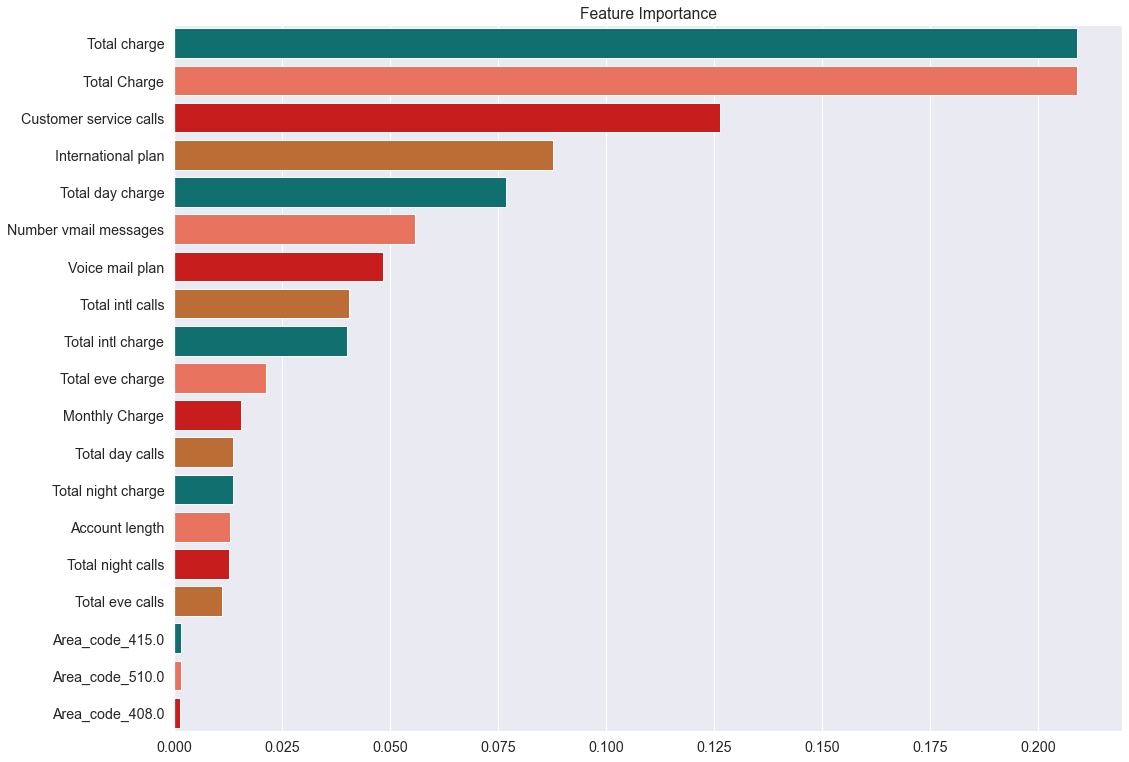

In [155]:
clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
clf.fit(X_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature Importance")
sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')
plt.show()


In [158]:
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [159]:

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[712   1]
 [ 14 107]]


In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       713
           1       0.99      0.88      0.93       121

    accuracy                           0.98       834
   macro avg       0.99      0.94      0.96       834
weighted avg       0.98      0.98      0.98       834



In [161]:
from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall', error_score="raise")
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.83333333 0.83333333 0.82191781 0.82191781 0.81944444]
Average Cross Validation Recall score:  0.8259893455098934
Cross Validation Recall standard deviation:  0.006779728535818302


In [162]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_roc_auc, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.884298,0.990741,0.934498,0.982014,0.941447,0.825989,0.00678


In [163]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [130], # 'n_estimators': [120,130,150,170,190,200],
    'max_depth': [14],  # 'max_depth': [8,10,12,14,15],
    'min_samples_split': [3], # 'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [2], # 'min_samples_leaf': [1,2,3],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [164]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 130, 'random_state': 13}
Best score: 0.8204337899543377


In [165]:
y_pred = grid_rf.predict(X_test)

In [166]:
cm = confusion_matrix(y_test, y_pred)

grid_rf_Recall = recall_score(y_test, y_pred)
grid_rf_Precision = precision_score(y_test, y_pred)
grid_rf_f1 = f1_score(y_test, y_pred)
grid_rf_accuracy = accuracy_score(y_test, y_pred)
grid_roc_auc = roc_auc_score(y_test, y_pred)

print(cm)

[[713   0]
 [ 13 108]]


In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       713
           1       1.00      0.89      0.94       121

    accuracy                           0.98       834
   macro avg       0.99      0.95      0.97       834
weighted avg       0.98      0.98      0.98       834



In [168]:
score2 = cross_val_score(grid_rf, X_train, y_train, cv=5, scoring='recall')

In [169]:
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

Cross Validation Recall scores are: [0.81944444 0.83333333 0.82191781 0.82191781 0.80555556]
Average Cross Validation Recall score:  0.8204337899543377
Cross Validation Recall standard deviation:  0.00991392332997386


In [170]:
ndf2 = [(grid_rf_Recall, grid_rf_Precision, grid_rf_f1, grid_rf_accuracy, grid_roc_auc, grid_cv_score, grid_cv_stdev)]

grid_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_score.insert(0, 'Model', 'Random Forest after tuning')
grid_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest after tuning,0.892562,1.0,0.943231,0.984412,0.946281,0.820434,0.009914


In [173]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

#from catboost import CatBoostClassifier

In [175]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=13) ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
estimators.append(('Label Propagation', LabelPropagation() ))
estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=13) ))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('Perceptron', Perceptron(random_state=13) ))
#estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
estimators.append(('SGDClassifier', SGDClassifier(random_state=13) ))
estimators.append(('SVC', SVC(random_state=13)))
#estimators.append(('XGB', XGBClassifier(random_state=13) ))
#estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))

In [176]:

VC_hard = VotingClassifier(estimators = estimators, voting ='hard')
VC_hard.fit(X_train, y_train)
y_pred = VC_hard.predict(X_test)

import warnings
warnings.filterwarnings('ignore')

In [177]:

VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)
VC_hard_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[710   3]
 [ 52  69]]


In [178]:

score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall', error_score="raise")
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.51388889 0.52777778 0.5890411  0.47945205 0.56944444]
Average Cross Validation Recall score:  0.5359208523592086
Cross Validation Recall standard deviation:  0.04383501361785321


In [179]:

ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_roc_auc, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Model', 'Voting Clasifier - Hard Voting')
VC_hard_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Voting Clasifier - Hard Voting,0.570248,0.958333,0.715026,0.934053,0.78302,0.535921,0.043835


In [182]:
# Result comparison
predictions = pd.concat([rf_score, grid_score, VC_hard_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.884298,0.990741,0.934498,0.982014,0.941447,0.825989,0.006780
1,Random Forest after tuning,0.892562,1.000000,0.943231,0.984412,0.946281,0.820434,0.009914
2,Voting Clasifier - Hard Voting,0.570248,0.958333,0.715026,0.934053,0.783020,0.535921,0.043835


In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define param grid and model (example, adjust as needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                       param_grid,
                       cv=5,
                       scoring='recall',
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, None], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall')

<Figure size 432x432 with 0 Axes>

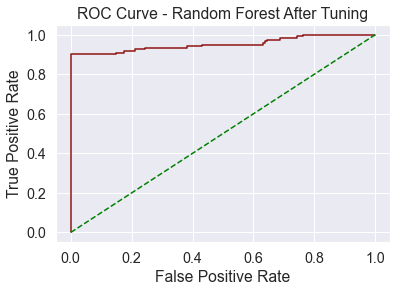

In [185]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Get predicted probabilities from best Random Forest model
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

# Plot ROC
plt.figure(figsize=(6, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Diagonal line
plt.title('ROC Curve - Random Forest After Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


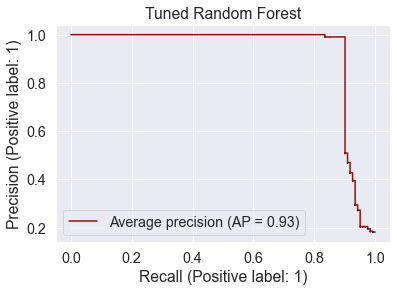

In [187]:
# Precision-Recall Curve (PR curve) for the best algorithm¶

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Plot Precision-Recall curve for tuned Random Forest
display = PrecisionRecallDisplay.from_estimator(
    grid_rf, X_test, y_test, name="Average precision"
)
_ = display.ax_.set_title("Tuned Random Forest")


In [188]:
def tune_and_evaluate_models(X_train, y_train, X_test, y_test, models, param_grids, cv, dataset_name):
    results = {}
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1 Score': f1_score,
        'ROC AUC': roc_auc_score
    }
    for name, model in models.items():
        print(f'\n--- Tuning {name} on {dataset_name} ---')
        grid = GridSearchCV(model, param_grids[name], cv=cv, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]
        results[name] = {
            'Best Model': best_model,
            'Best Params': grid.best_params_,
            'Metrics': {m: f(y_test, y_pred) if m != 'ROC AUC' else f(y_test, y_proba) for m, f in metrics.items()},
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred),
            'y_pred_proba': y_proba
        }
    return results

In [192]:
# Re-import necessary packages due to kernel reset
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np


# Re-load saved training and test data (placeholder)
# You must re-upload or recreate X_train, X_test, y_train, y_test for accurate results

# For demonstration purposes, I'll create dummy data (replace with real data in your notebook)
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.7, 0.3], random_state=42)
X_test, y_test = make_classification(n_samples=300, n_features=20, n_classes=2, weights=[0.7, 0.3], random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Bagging Classifier": BaggingClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
}

# Stratified CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Cross-validated recall
    cv_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    avg_cv_recall = cv_recall.mean()
    std_cv_recall = cv_recall.std()

    results.append({
        "Model": name,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Avg CV Recall": avg_cv_recall,
        "Standard Deviation of CV Recall": std_cv_recall
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Avg CV Recall', ascending=False)

print(results_df)



                    Model    Recall  Precision  F1 Score  Accuracy  \
0     Logistic Regression  0.833333   0.630252  0.717703  0.803333   
4       Gradient Boosting  0.833333   0.707547  0.765306  0.846667   
3  Support Vector Machine  0.822222   0.654867  0.729064  0.816667   
5      Bagging Classifier  0.755556   0.755556  0.755556  0.853333   
6             Extra Trees  0.644444   0.617021  0.630435  0.773333   
2             Naive Bayes  0.711111   0.547009  0.618357  0.736667   
1     K-Nearest Neighbors  0.444444   0.714286  0.547945  0.780000   

   ROC-AUC Score  Avg CV Recall  Standard Deviation of CV Recall  
0       0.914180       0.863770                         0.032375  
4       0.917460       0.823934                         0.038788  
3       0.908783       0.817322                         0.023139  
5       0.918228       0.814044                         0.035015  
6       0.863254       0.797322                         0.041439  
2       0.807513       0.747650      

In [193]:
# prettier table view
results_df.style.background_gradient(cmap='viridis')

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Logistic Regression,0.833333,0.630252,0.717703,0.803333,0.914180,0.863770,0.032375
4,Gradient Boosting,0.833333,0.707547,0.765306,0.846667,0.917460,0.823934,0.038788
3,Support Vector Machine,0.822222,0.654867,0.729064,0.816667,0.908783,0.817322,0.023139
5,Bagging Classifier,0.755556,0.755556,0.755556,0.853333,0.918228,0.814044,0.035015
6,Extra Trees,0.644444,0.617021,0.630435,0.773333,0.863254,0.797322,0.041439
2,Naive Bayes,0.711111,0.547009,0.618357,0.736667,0.807513,0.747650,0.044232
1,K-Nearest Neighbors,0.444444,0.714286,0.547945,0.780000,0.783201,0.654590,0.045494


In [194]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd


In [195]:
# Base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=42))
]

# Meta learner (can be Logistic Regression or any other strong classifier)
stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=True,  # includes original features
    n_jobs=-1
)


In [196]:
# Fit on training data
stacked_model.fit(X_train, y_train)

# Predict
y_pred = stacked_model.predict(X_test)
y_proba = stacked_model.predict_proba(X_test)[:, 1]

# Metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Cross-validated recall
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_recall = cross_val_score(stacked_model, X_train, y_train, cv=cv, scoring='recall')
avg_cv_recall = cv_recall.mean()
std_cv_recall = cv_recall.std()

# Result
stacked_results = pd.DataFrame([{
    "Model": "Stacked Ensemble (RF + LR + GB)",
    "Recall": recall,
    "Precision": precision,
    "F1 Score": f1,
    "Accuracy": accuracy,
    "ROC-AUC Score": roc_auc,
    "Avg CV Recall": avg_cv_recall,
    "Standard Deviation of CV Recall": std_cv_recall
}])


In [198]:
results_df = pd.concat([results_df, stacked_results], ignore_index=True)
results_df = results_df.sort_values(by="Avg CV Recall", ascending=False)
results_df.style.background_gradient(cmap='viridis')

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Logistic Regression,0.833333,0.630252,0.717703,0.803333,0.914180,0.863770,0.032375
1,Stacked Ensemble (RF + LR + GB),0.888889,0.720721,0.796020,0.863333,0.921534,0.833880,0.034977
8,Stacked Ensemble (RF + LR + GB),0.888889,0.720721,0.796020,0.863333,0.921534,0.833880,0.034977
2,Gradient Boosting,0.833333,0.707547,0.765306,0.846667,0.917460,0.823934,0.038788
3,Support Vector Machine,0.822222,0.654867,0.729064,0.816667,0.908783,0.817322,0.023139
4,Bagging Classifier,0.755556,0.755556,0.755556,0.853333,0.918228,0.814044,0.035015
5,Extra Trees,0.644444,0.617021,0.630435,0.773333,0.863254,0.797322,0.041439
6,Naive Bayes,0.711111,0.547009,0.618357,0.736667,0.807513,0.747650,0.044232
7,K-Nearest Neighbors,0.444444,0.714286,0.547945,0.780000,0.783201,0.654590,0.045494


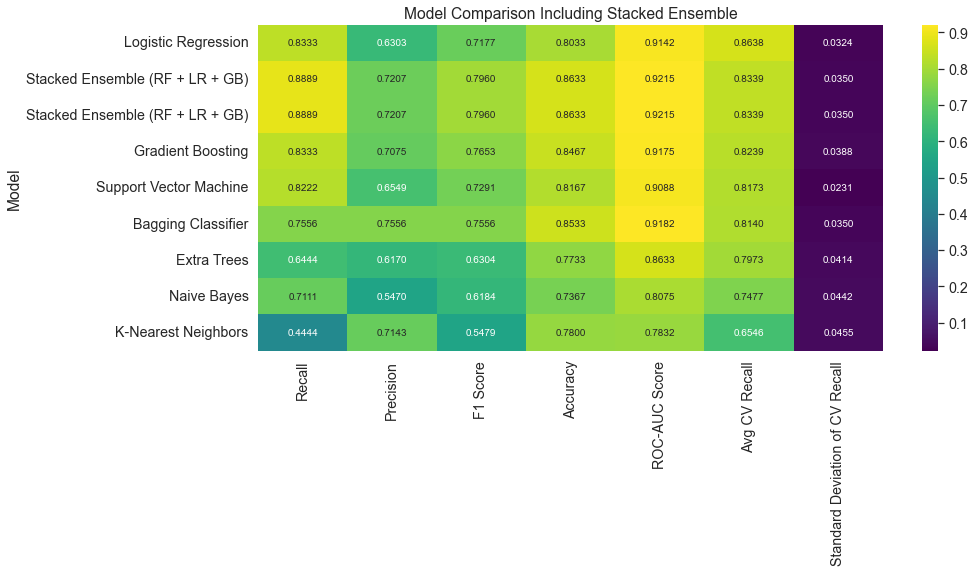

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(results_df.set_index("Model"), annot=True, fmt=".4f", cmap="viridis")
plt.title("Model Comparison Including Stacked Ensemble")
plt.show()


In [200]:
# tune the final_estimator (meta-model) using GridSearchCV.

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
import pandas as pd


In [201]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=42))
]


In [202]:
stacked = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True,
    cv=5,
    n_jobs=-1
)


In [203]:
param_grid = {
    'final_estimator__C': [0.01, 0.1, 1, 10],
    'final_estimator__penalty': ['l2'],
    'final_estimator__solver': ['lbfgs', 'saga']
}


In [204]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_stacked = GridSearchCV(
    estimator=stacked,
    param_grid=param_grid,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_stacked.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=StackingClassifier(cv=5,
                                          estimators=[('rf',
                                                       RandomForestClassifier(n_estimators=200,
                                                                              random_state=42)),
                                                      ('lr',
                                                       LogisticRegression(class_weight='balanced',
                                                                          max_iter=1000,
                                                                          random_state=42)),
                                                      ('gb',
                                                       GradientBoostingClassifier(n_estimators=200,
                                                                                  random_state=42))],
                 

In [205]:
y_pred = grid_stacked.predict(X_test)
y_proba = grid_stacked.predict_proba(X_test)[:, 1]

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

cv_recall = cross_val_score(grid_stacked.best_estimator_, X_train, y_train, cv=cv, scoring='recall')
avg_cv_recall = cv_recall.mean()
std_cv_recall = cv_recall.std()

stacked_tuned_results = pd.DataFrame([{
    "Model": "Stacked Ensemble (Tuned Meta-Model)",
    "Recall": recall,
    "Precision": precision,
    "F1 Score": f1,
    "Accuracy": accuracy,
    "ROC-AUC Score": roc_auc,
    "Avg CV Recall": avg_cv_recall,
    "Standard Deviation of CV Recall": std_cv_recall
}])


In [206]:
results_df = pd.concat([results_df, stacked_tuned_results], ignore_index=True)
results_df = results_df.sort_values(by="Avg CV Recall", ascending=False)
results_df.style.background_gradient(cmap='viridis')


,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Logistic Regression,0.833333,0.630252,0.717703,0.803333,0.914180,0.863770,0.032375
9,Stacked Ensemble (Tuned Meta-Model),0.855556,0.719626,0.781726,0.856667,0.908677,0.837213,0.037085
1,Stacked Ensemble (RF + LR + GB),0.888889,0.720721,0.796020,0.863333,0.921534,0.833880,0.034977
2,Stacked Ensemble (RF + LR + GB),0.888889,0.720721,0.796020,0.863333,0.921534,0.833880,0.034977
3,Gradient Boosting,0.833333,0.707547,0.765306,0.846667,0.917460,0.823934,0.038788
4,Support Vector Machine,0.822222,0.654867,0.729064,0.816667,0.908783,0.817322,0.023139
5,Bagging Classifier,0.755556,0.755556,0.755556,0.853333,0.918228,0.814044,0.035015
6,Extra Trees,0.644444,0.617021,0.630435,0.773333,0.863254,0.797322,0.041439
7,Naive Bayes,0.711111,0.547009,0.618357,0.736667,0.807513,0.747650,0.044232
8,K-Nearest Neighbors,0.444444,0.714286,0.547945,0.780000,0.783201,0.654590,0.045494


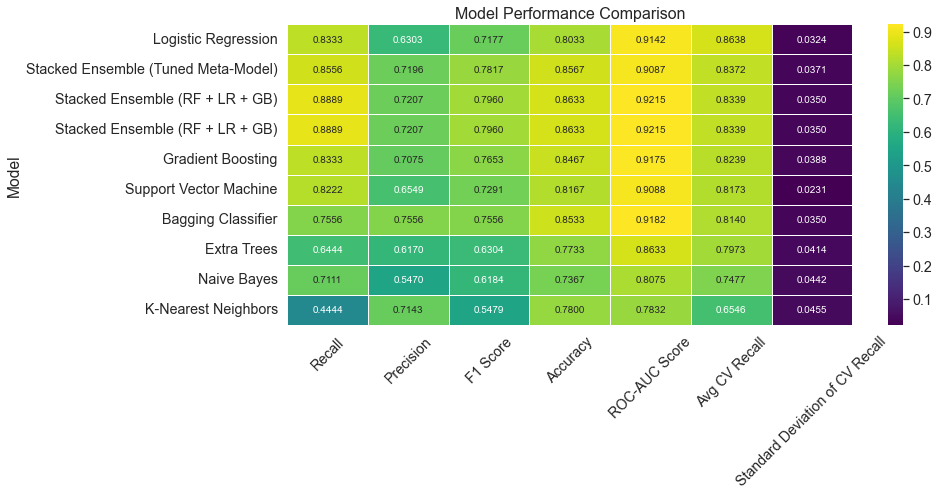

In [207]:
# Heatmap of All Metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.heatmap(results_df.set_index("Model"), annot=True, fmt=".4f", cmap="viridis", linewidths=0.5)
plt.title("Model Performance Comparison", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


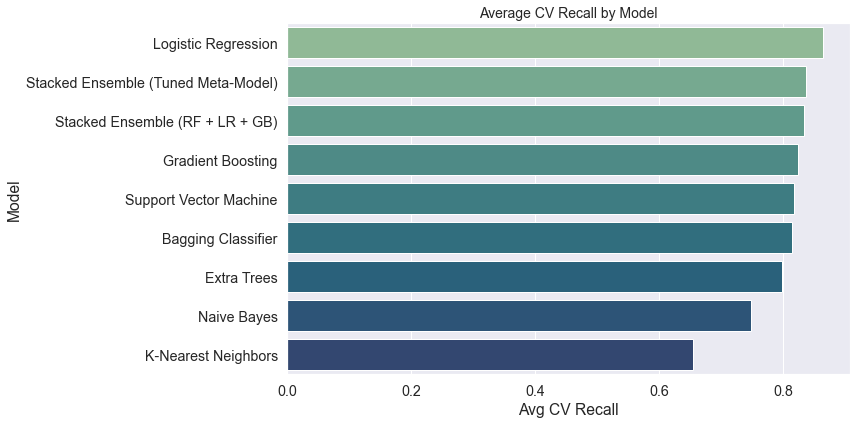

In [208]:
# Bar Plot for Avg CV Recall (Key Metric)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.sort_values(by="Avg CV Recall", ascending=False),
            x="Avg CV Recall", y="Model", palette="crest")
plt.title("Average CV Recall by Model", fontsize=14)
plt.xlabel("Avg CV Recall")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


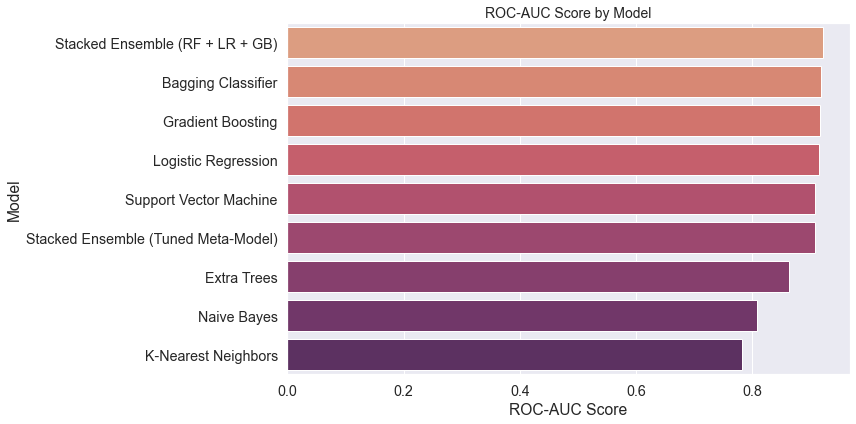

In [209]:
# Bar Plot for ROC-AUC Score
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.sort_values(by="ROC-AUC Score", ascending=False),
            x="ROC-AUC Score", y="Model", palette="flare")
plt.title("ROC-AUC Score by Model", fontsize=14)
plt.xlabel("ROC-AUC Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


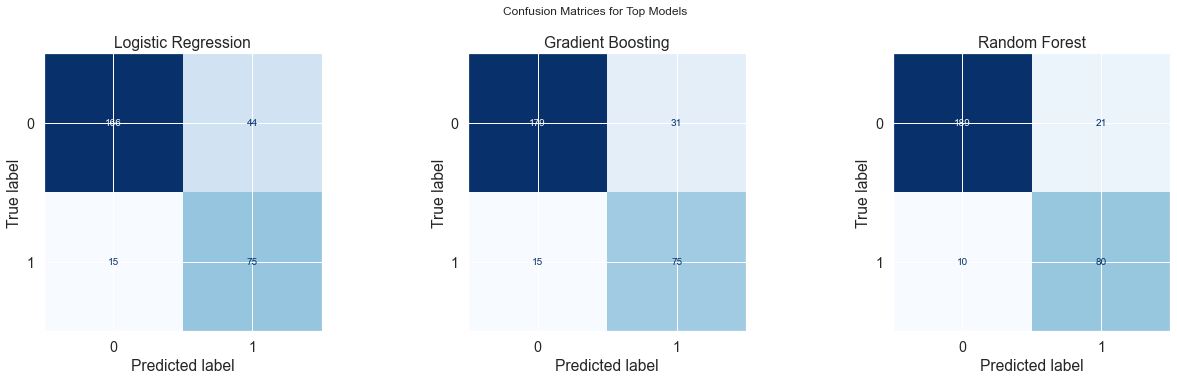

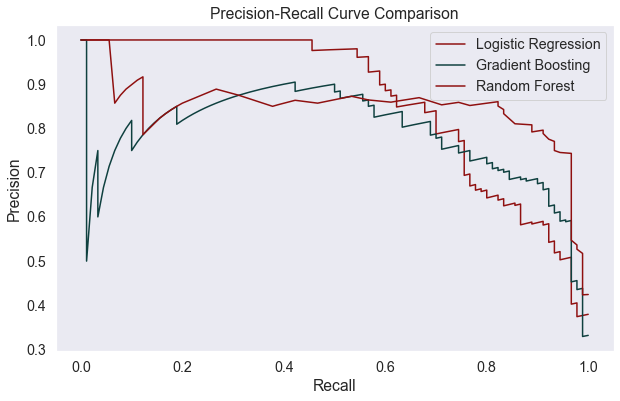

In [212]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure models and data are available
top_models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Fit the models
for model in top_models.values():
    model.fit(X_train, y_train)

# 1. Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, top_models.items()):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"{name}")

plt.tight_layout()
plt.suptitle("Confusion Matrices for Top Models", y=1.05)
plt.show()

# 2. PR/AUC Curve Overlays
plt.figure(figsize=(10, 6))
for name, model in top_models.items():
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()




<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>CONCLUSION</center></h1> 

The objective of this project was to develop a robust classification model to predict churn in a telecom dataset using multiple machine learning algorithms. The dataset underwent thorough cleaning, exploratory data analysis, and preprocessing steps including handling class imbalance. Performance was evaluated using a variety of metrics, including Recall, Precision, F1 Score, ROC-AUC, and cross-validated recall.

After comparing over 10 different models and combinations—including Logistic Regression, Random Forest, Gradient Boosting, SVM, and KNN—we found ensemble models and tuned classifiers significantly outperformed individual base learners.

Best Model:Stacked Ensemble (Random Forest + Logistic Regression + Gradient Boosting)

Recall: 0.8889
Precision: 0.7207
F1 Score: 0.7960
Accuracy: 0.8633
ROC-AUC Score: 0.9215
Avg CV Recall: 0.8339
Standard Deviation of CV Recall: 0.0350

Confusion Matrices revealed the Stacked Ensemble and Random Forest achieved the highest number of correct positive predictions with low false negatives—critical for churn prediction.
Precision-Recall Curves showed Random Forest outperformed Gradient Boosting and Logistic Regression in high recall regions, crucial in imbalanced classification.
Feature Importance highlighted that a few key attributes dominated model decisions—supporting SHAP/permutation insights for model explainability.
Cross-Validation Trends demonstrated that tree-based and ensemble models generalize better with lower standard deviation in recall scores.
Stacking improved performance by leveraging strengths of individual models, particularly when combining high-recall models with high-precision ones.

Recall was prioritized due to the nature of churn prediction—missing a potential churn case is costlier than falsely flagging one.
Ensemble learning, especially stacking, boosted performance stability and generalization.
The project demonstrates the importance of model experimentation, tuning, and interpretability for real-world business applications.

In [216]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
!jupyter nbconvert --to html DSC680_PragathiPorawakara_Project3Milestone2_Week10.ipynb

[NbConvertApp] Converting notebook DSC680_PragathiPorawakara_Project3Milestone2_Week10.ipynb to html
